In [228]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [229]:
def readTChemJson(file_name,tla=False):
    # read and parser json file
    f1 = open(file_name)
    data = json.load(f1)
    f1.close()
    # get variable names 
    var_names = data['variable name']
    # total number of time iterations (n_samples * number of time iterations)
    niter=len(data['state vector'])-1
    # get number of samples
    n_samples = int(data['number of samples']) 
    # ge time iteration per sample
    n = int(niter/n_samples)
    t = []
    dt = []
    sp = []
    count =0
    # loop over data
    for i in range(n):
        temp_t = []
        temp_dt = []
        temp_sp = []
        for j in range(n_samples):
            st = data['state vector'][count]
            count +=1
            temp_t += [st['t']]
            temp_dt += [st['dt']]
            temp_sp += [st['data']]
        t += [temp_t]
        dt += [temp_dt]
        sp += [temp_sp]
    # convert to np.array    
    sp = np.array(sp)
    t = np.array(t)
    dt = np.array(dt)
    if tla:
        return var_names, t, dt, sp, n_samples, data['parameter name']
    else:
        return var_names, t, dt, sp, n_samples
        

In [230]:
file_name="tchem-reactor-state-vector.json"

In [231]:
var_names, t, dt, data, n_samples = readTChemJson(file_name)

In [232]:
# note shape data => dim 1: number of time iterations 
# dim 2: number of samples
# dim 3: number of variables which includes density, pressure, temperature, and mass fraction of gas species 
print(np.shape(data))

(294, 5, 12)


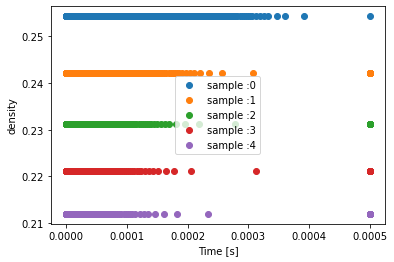

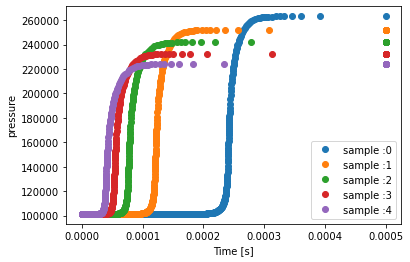

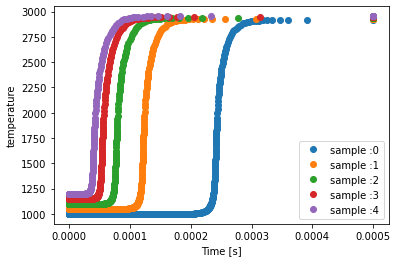

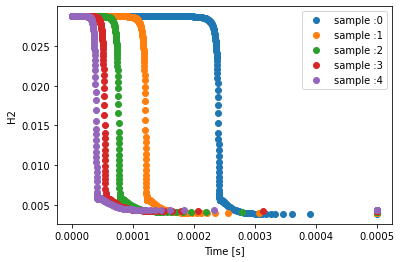

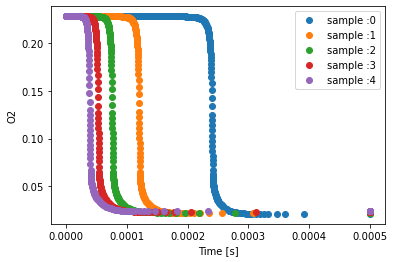

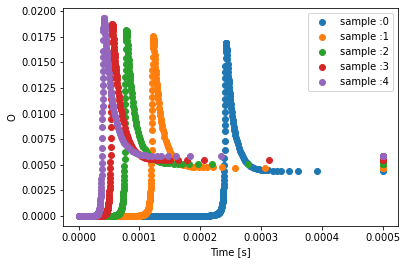

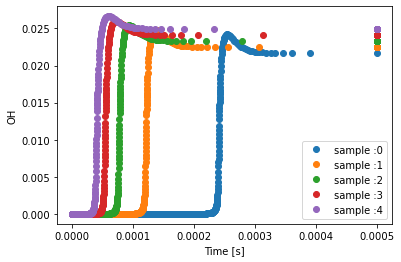

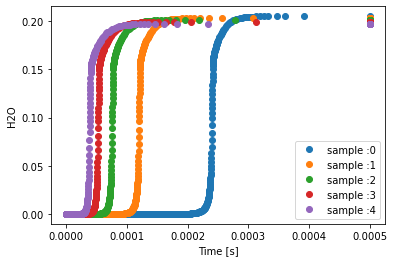

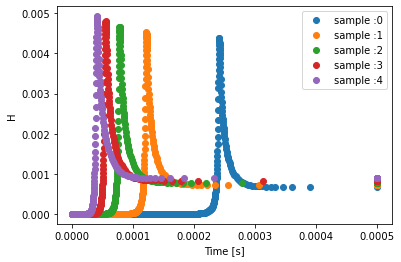

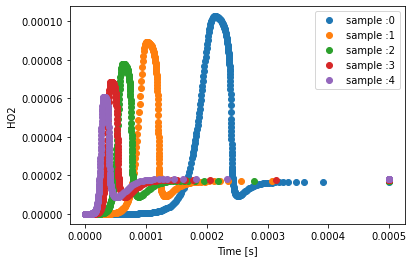

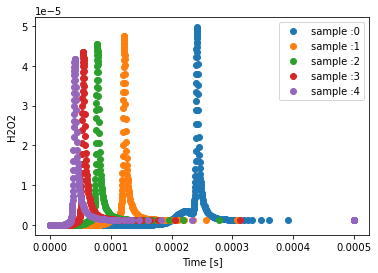

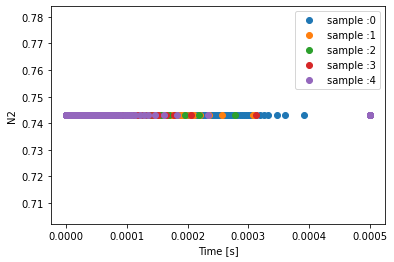

In [233]:
for i, var in enumerate(var_names):
    plt.figure()
    for j in range(n_samples):
        plt.plot(t[:,j], data[:,j,i],'o', label='sample :'+str(j))
    plt.xlabel('Time [s]')
    plt.legend()
    plt.ylabel(var)

In [234]:
file_name_tla = 'tchem-reactor-sensitivity-to-ignition-delay-time.json'
var_names_tla, t_tla, dt_tla, data_tla, n_samples_tla, parameter_names = readTChemJson(file_name_tla,tla=True)

In [235]:
# note shape data => dim 1: number of time iterations 
# dim 2: number of samples
# dim 3: number of variables (n species +1 x number of reactions )
print(np.shape(data_tla))

(294, 5, 190)


In [236]:
# make labels for TLA
n_variables = len(var_names_tla)
n_parameters = len(parameter_names)
tla_labels = []
for ij in range(n_variables*n_parameters):
    # using tchem saving pattern
    i = int(ij / n_parameters)
    j = ij % n_parameters
    tla_labels += ['var: '+ var_names_tla[i]+' id: '+parameter_names[j]]

/var/folders/np/m42416h166j90krvxmfl40940000gp/T/ipykernel_32669/3146380021.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


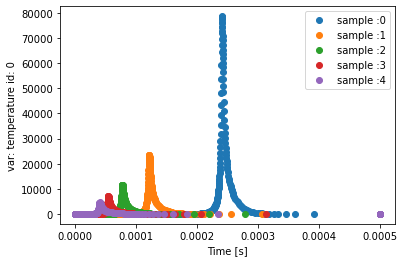

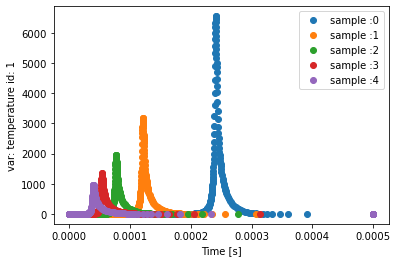

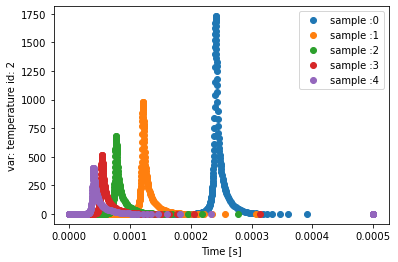

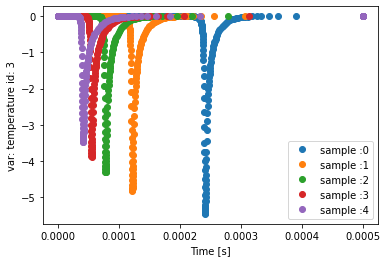

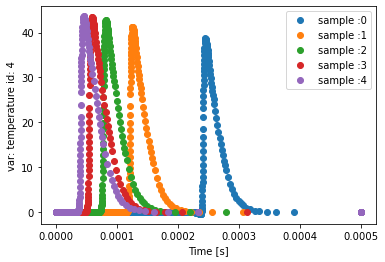

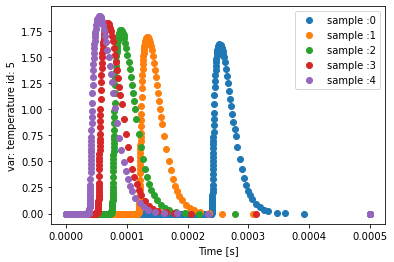

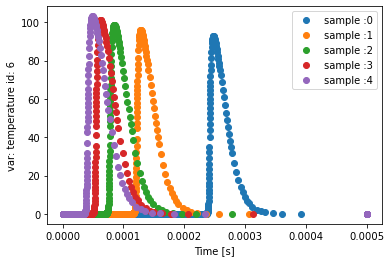

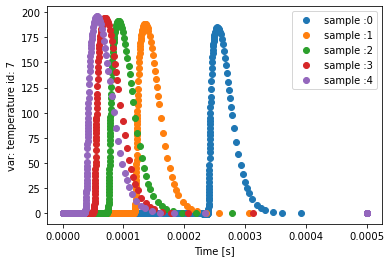

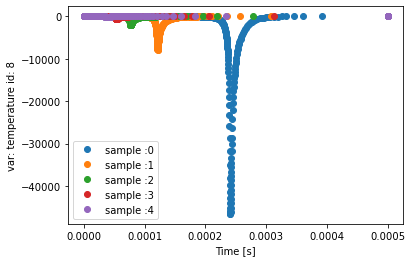

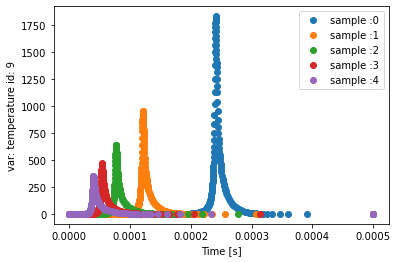

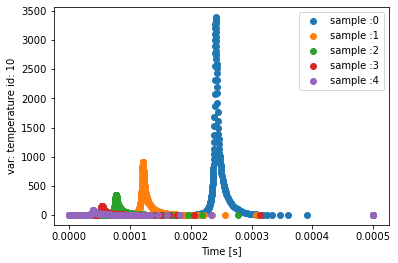

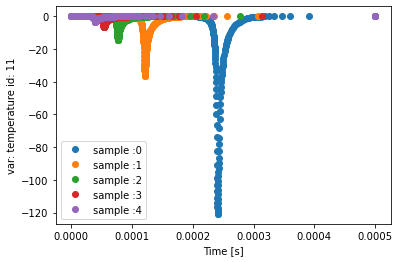

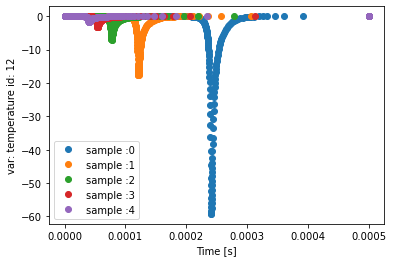

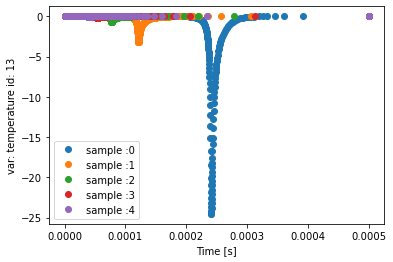

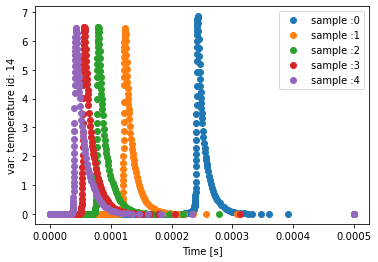

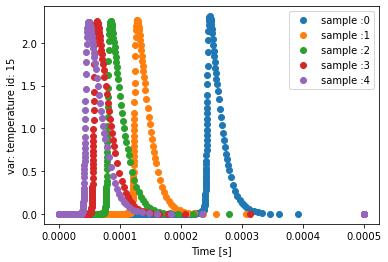

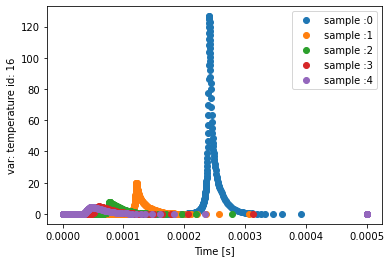

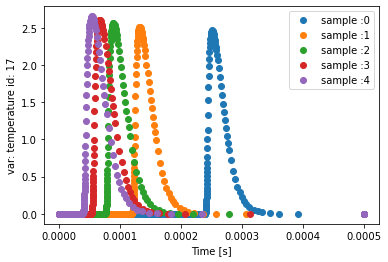

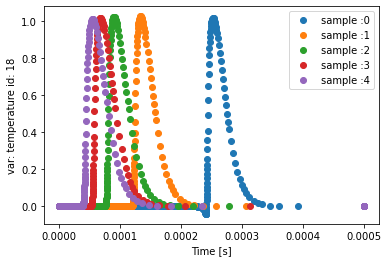

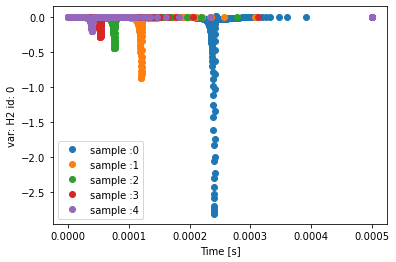

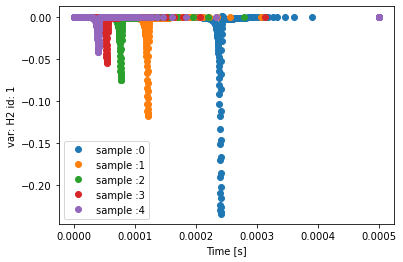

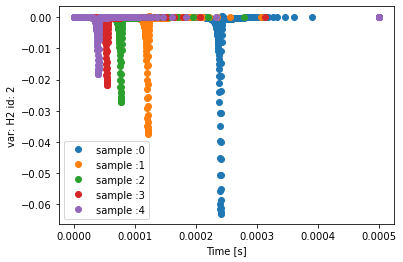

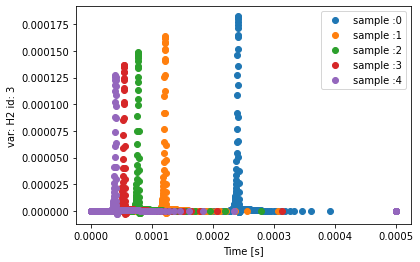

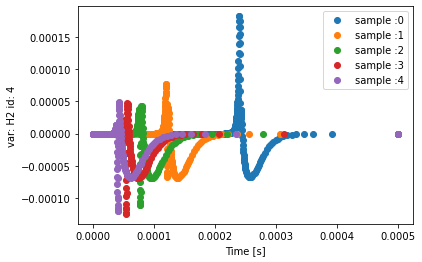

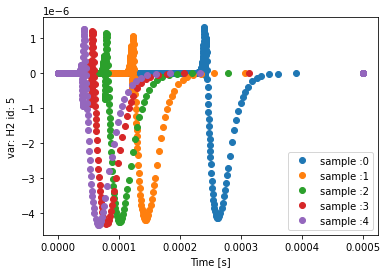

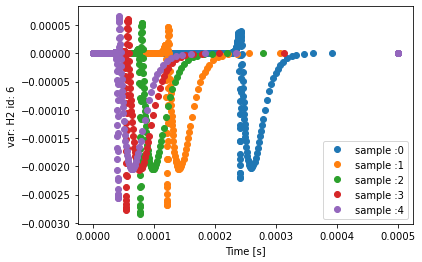

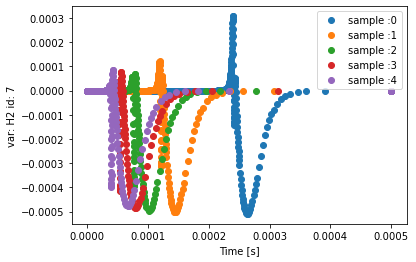

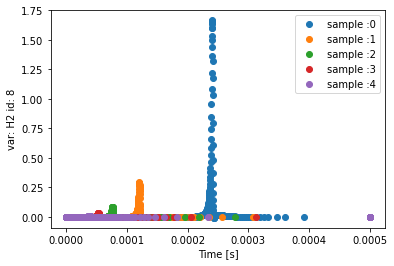

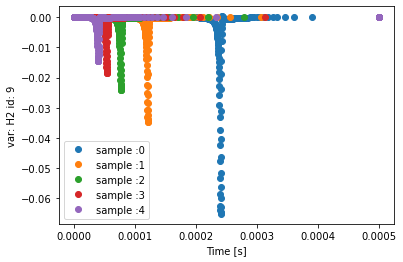

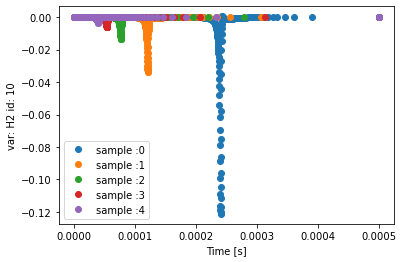

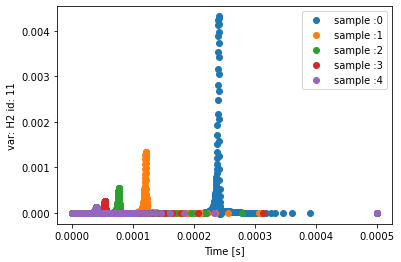

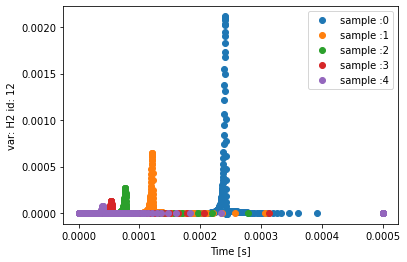

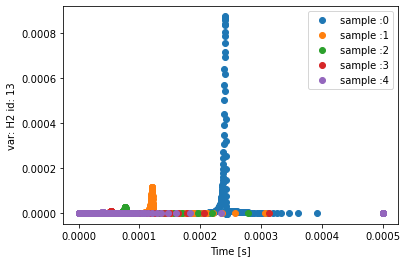

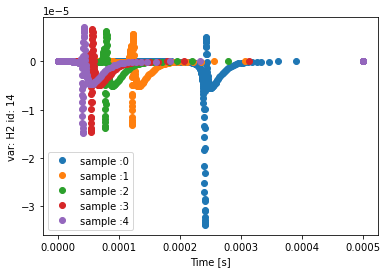

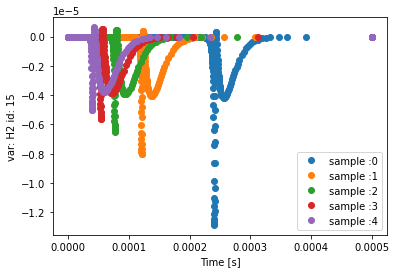

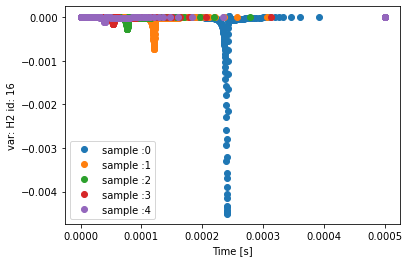

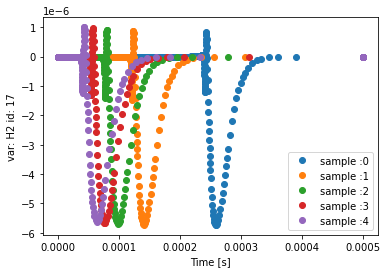

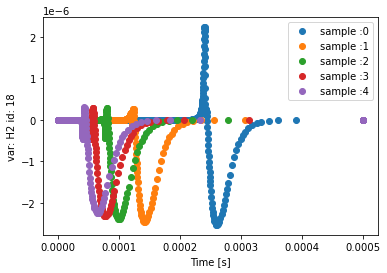

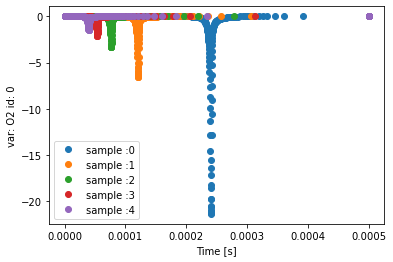

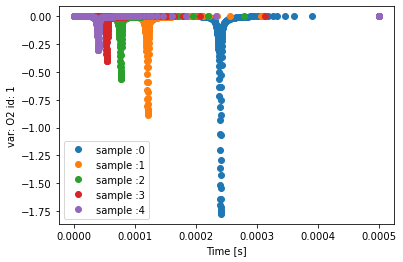

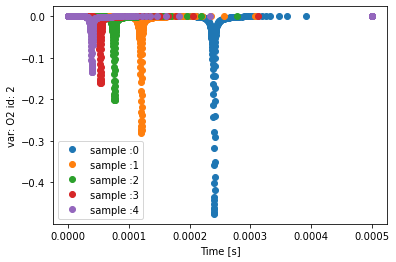

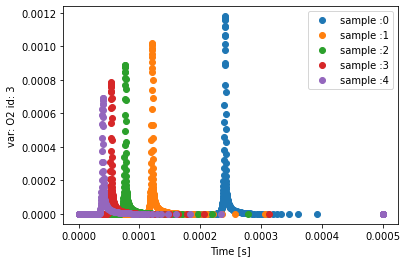

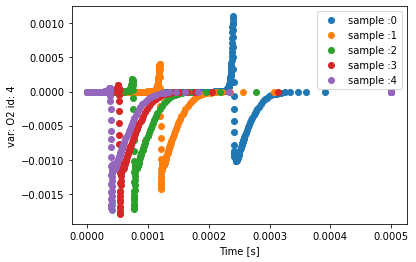

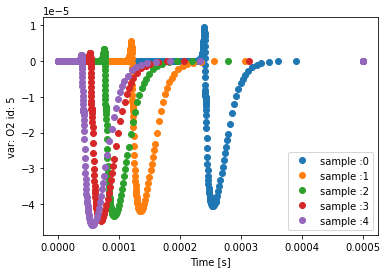

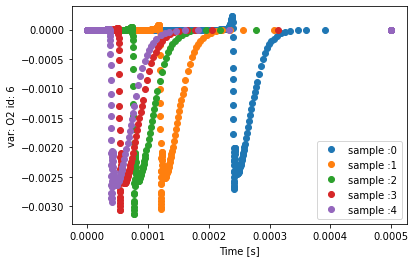

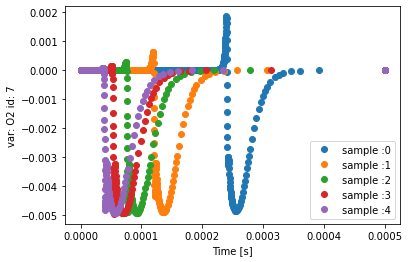

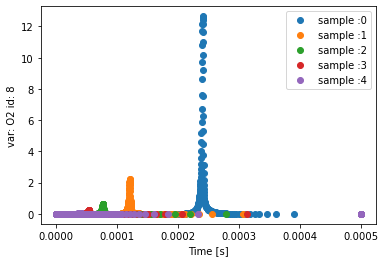

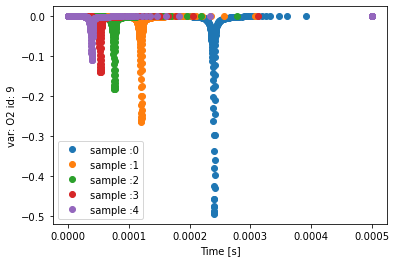

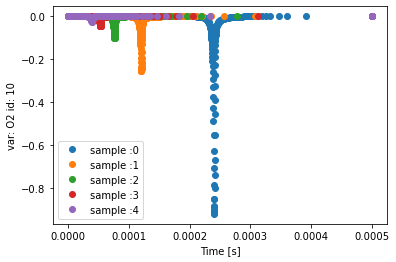

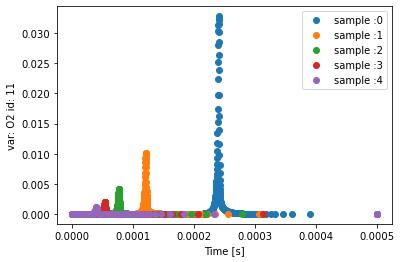

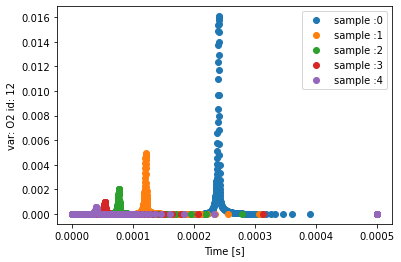

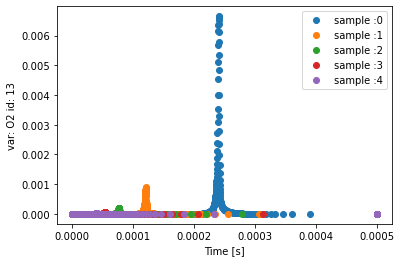

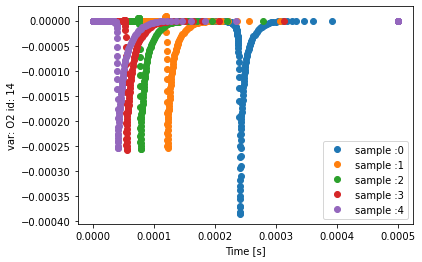

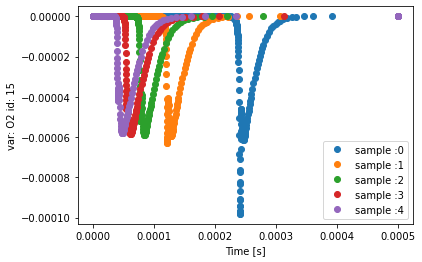

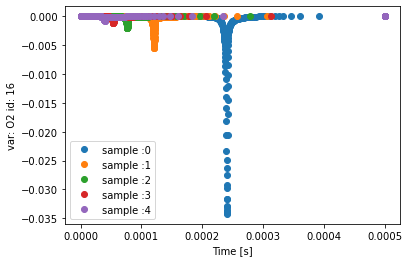

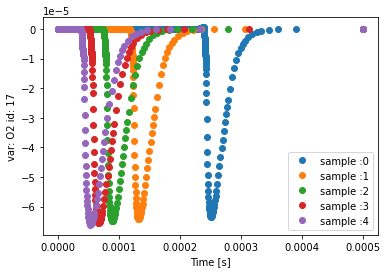

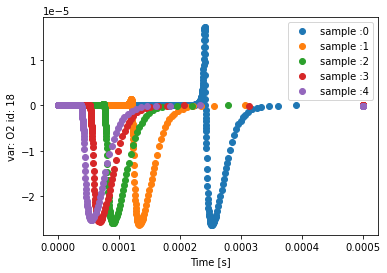

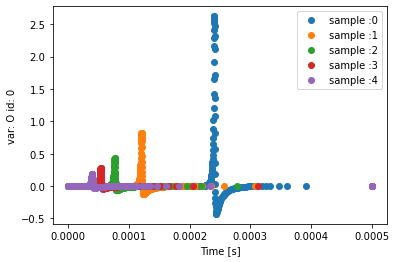

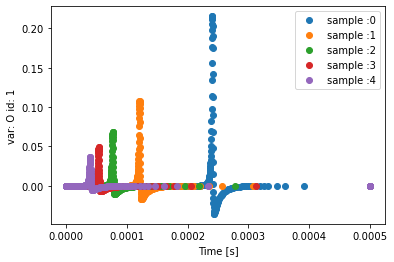

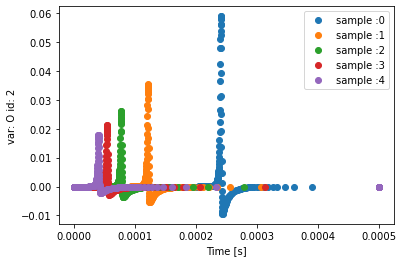

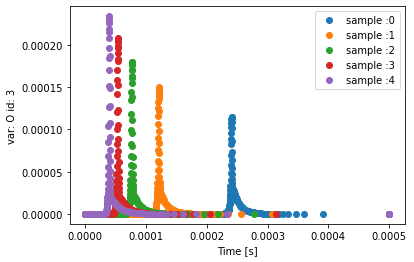

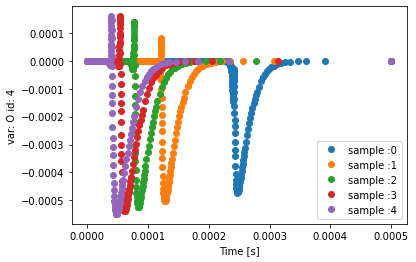

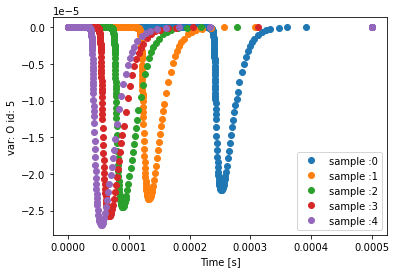

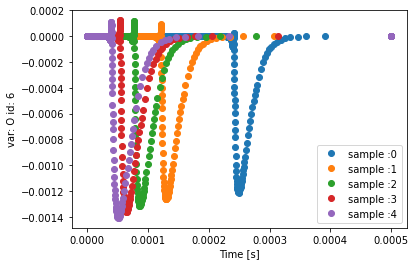

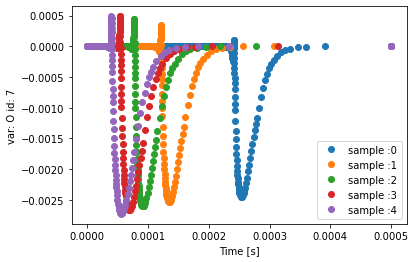

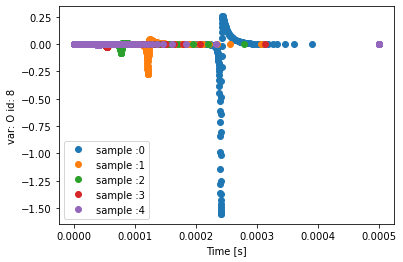

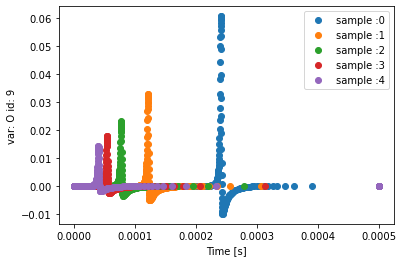

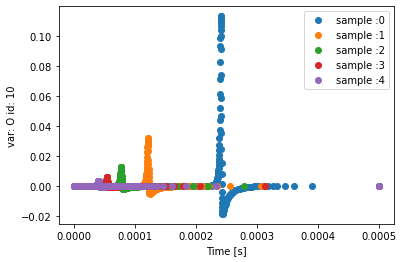

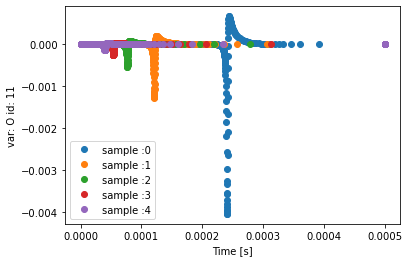

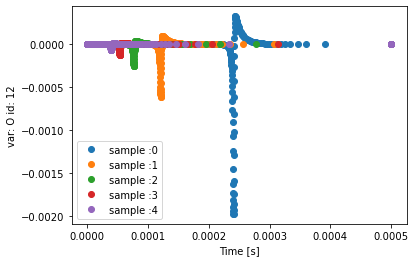

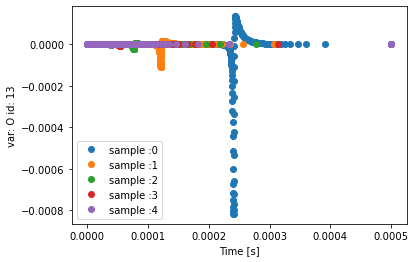

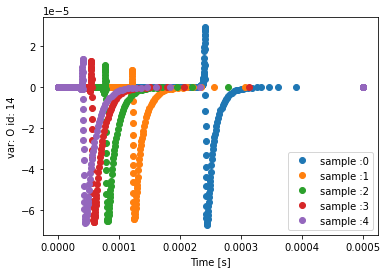

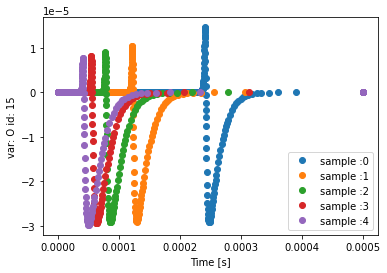

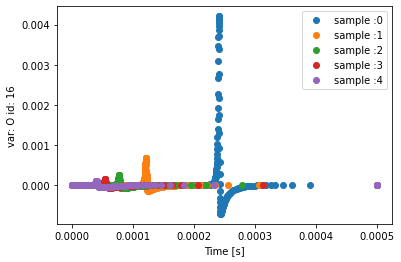

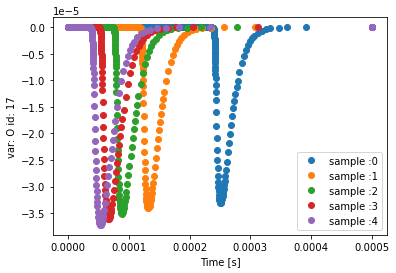

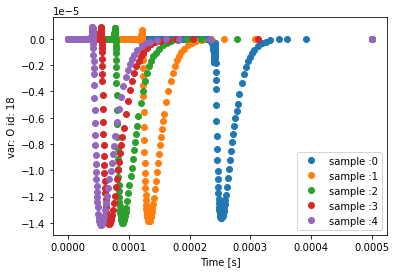

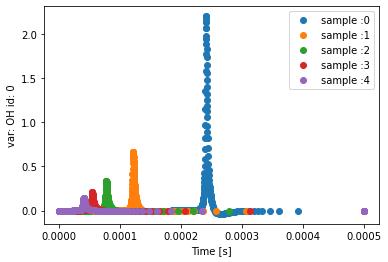

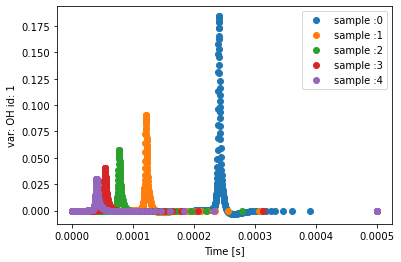

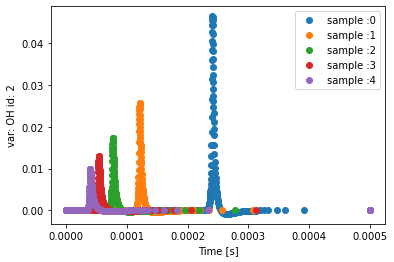

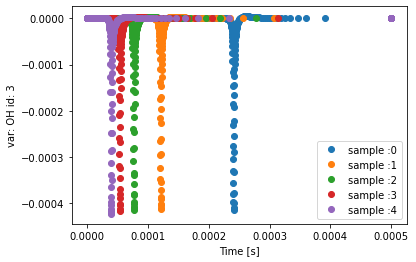

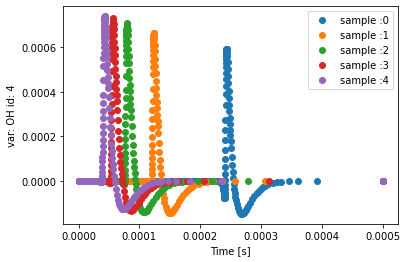

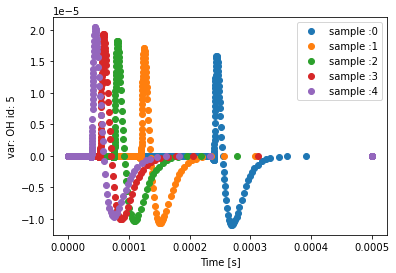

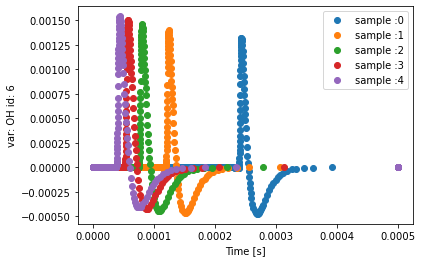

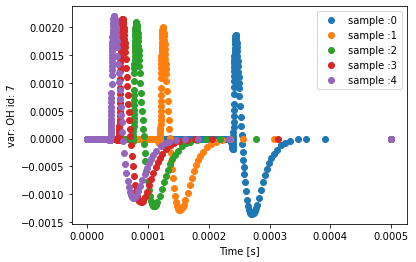

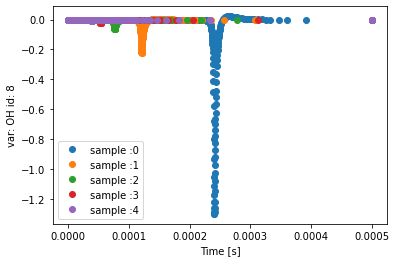

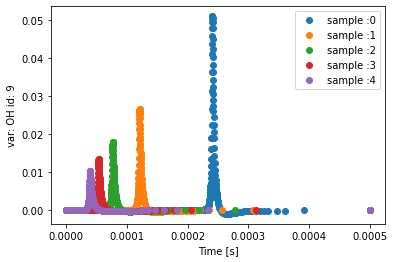

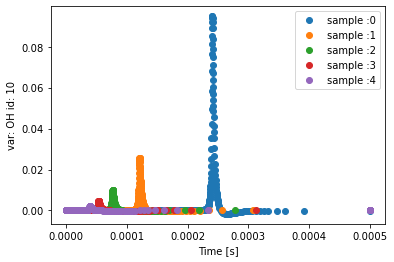

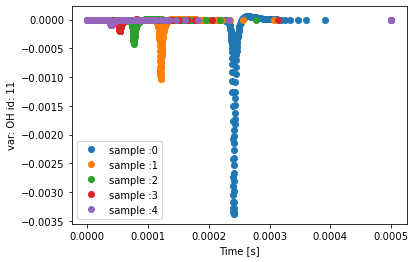

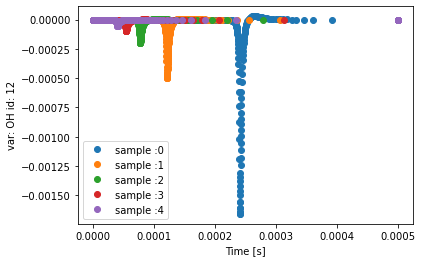

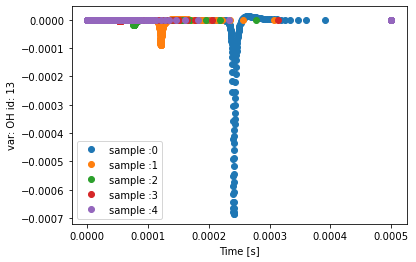

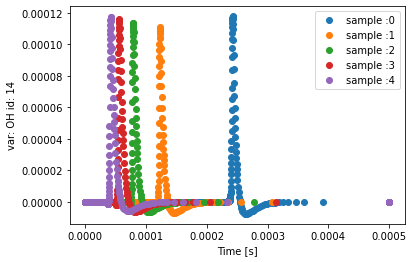

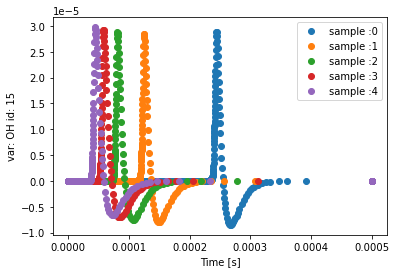

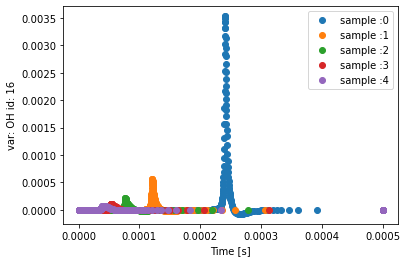

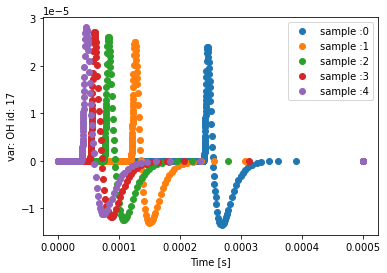

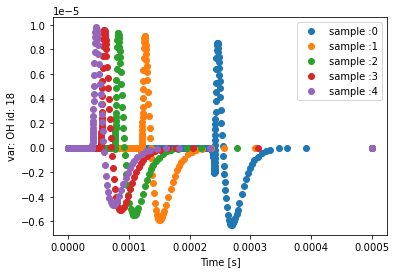

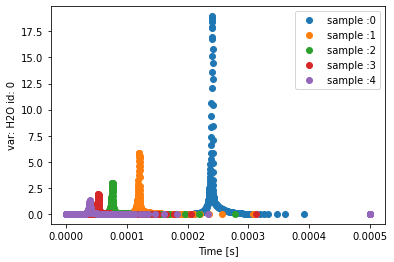

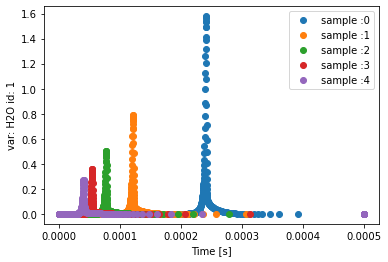

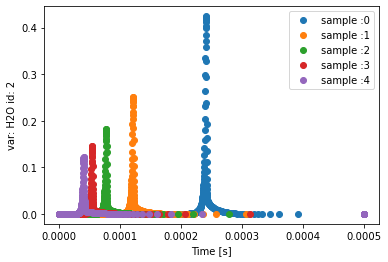

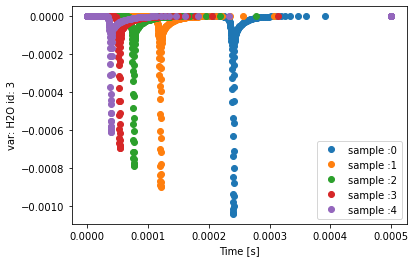

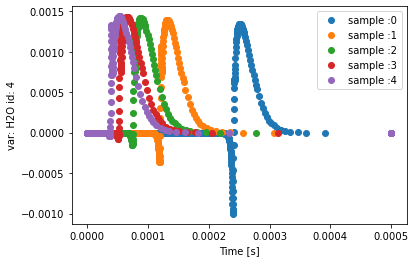

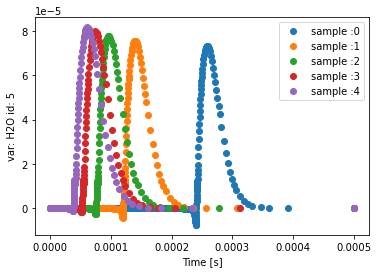

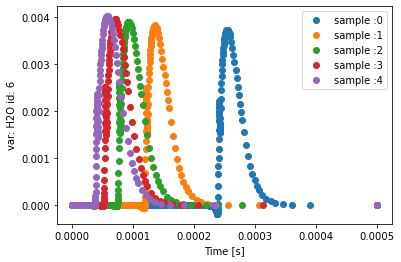

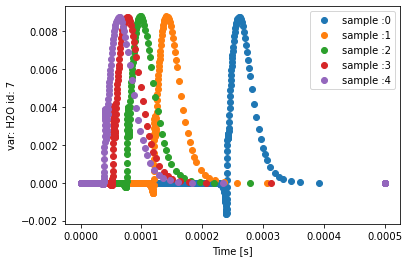

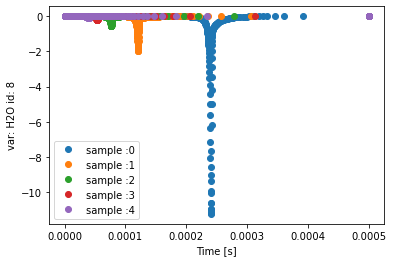

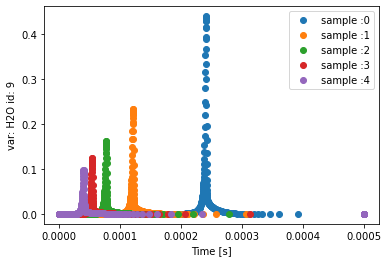

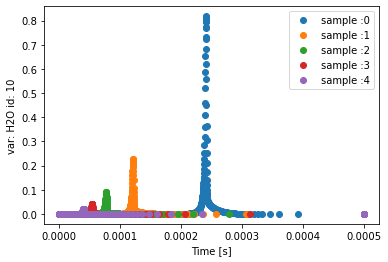

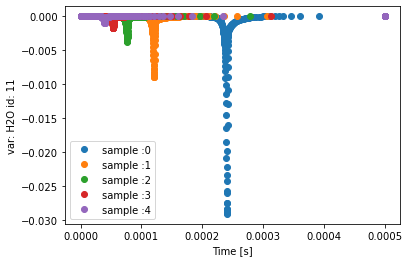

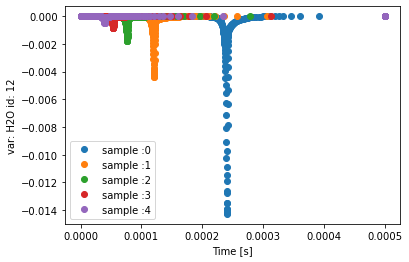

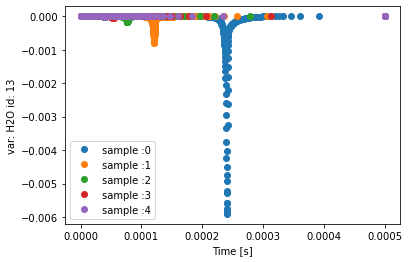

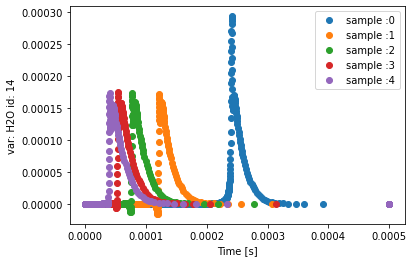

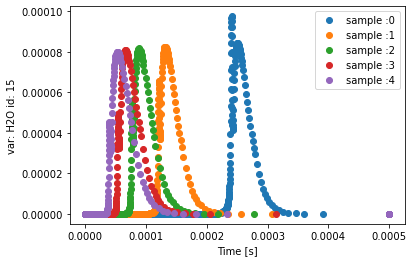

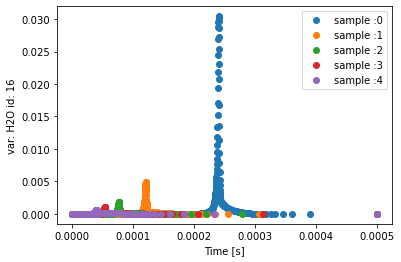

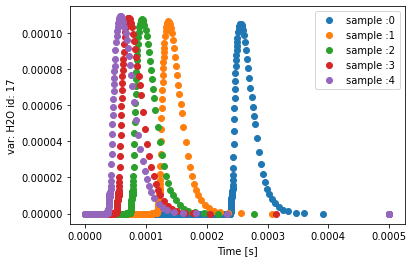

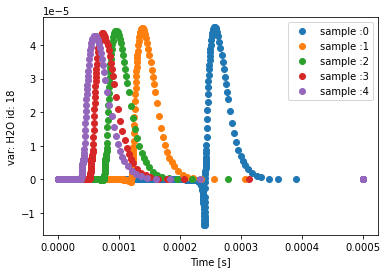

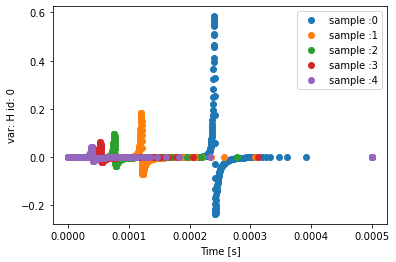

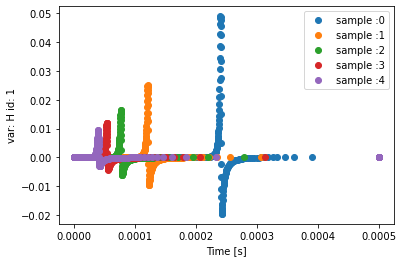

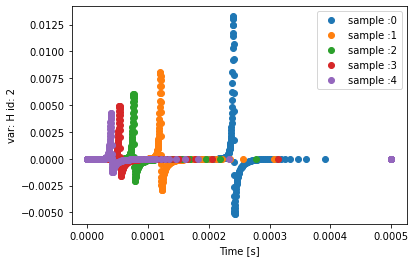

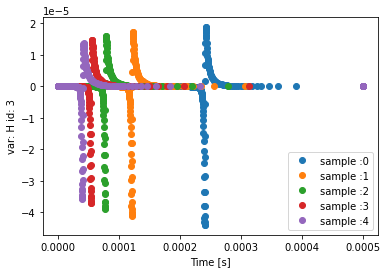

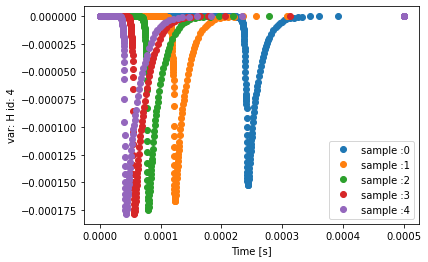

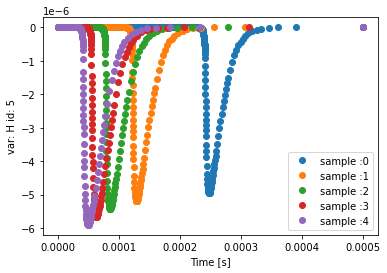

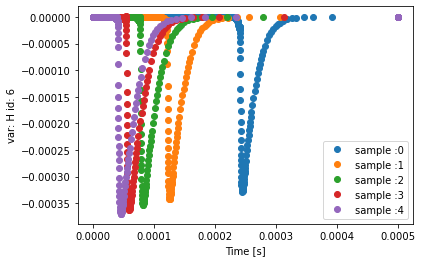

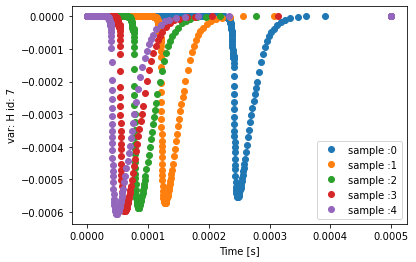

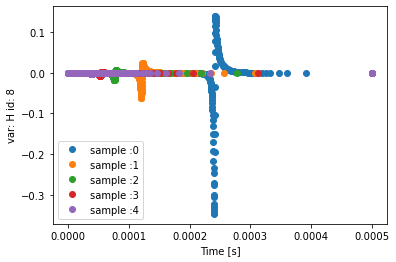

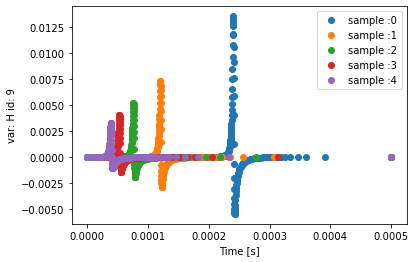

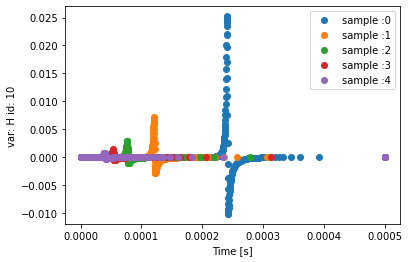

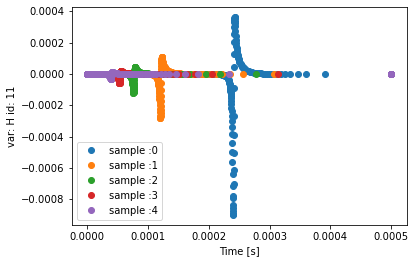

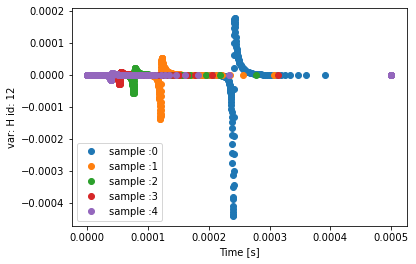

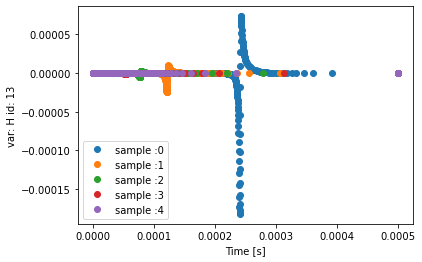

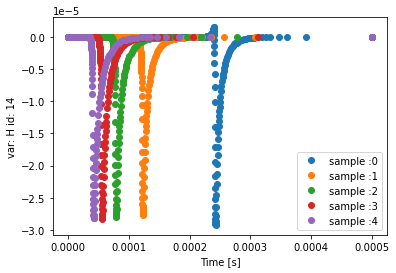

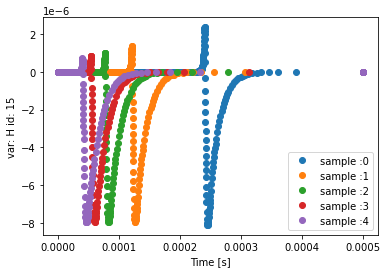

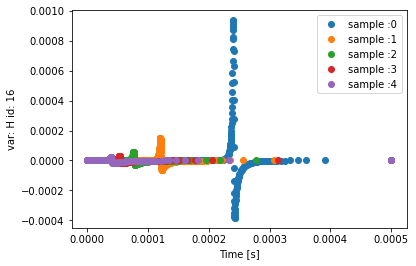

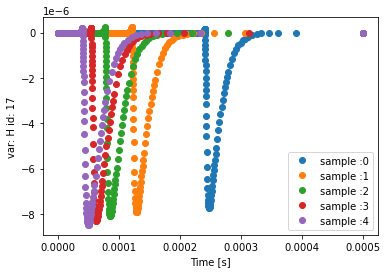

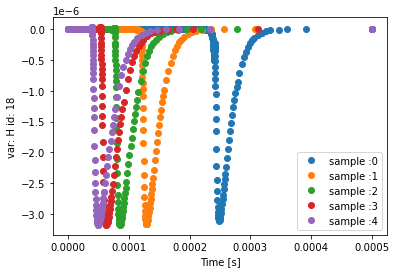

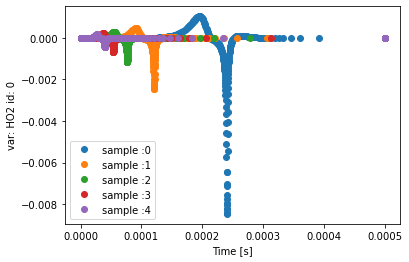

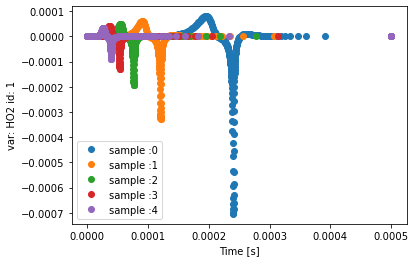

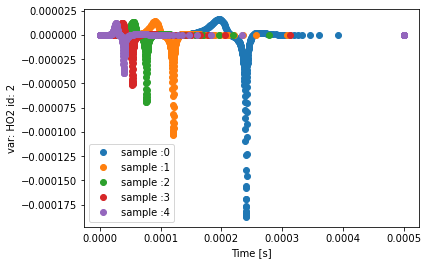

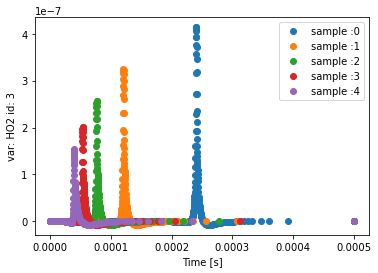

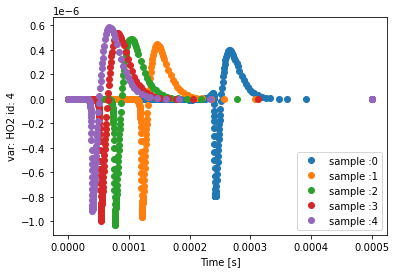

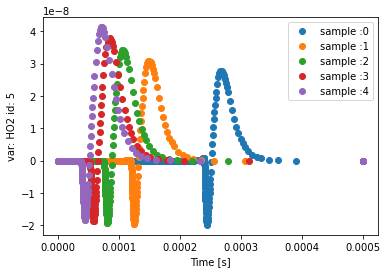

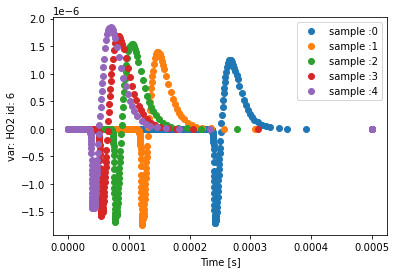

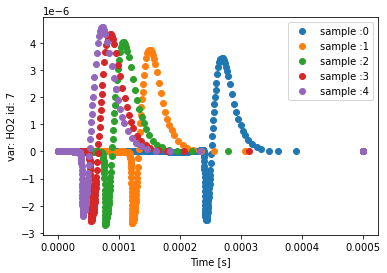

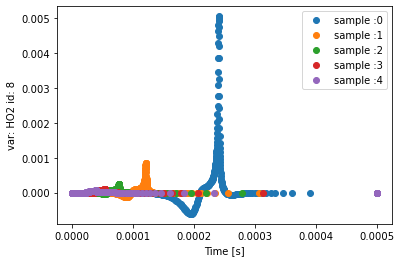

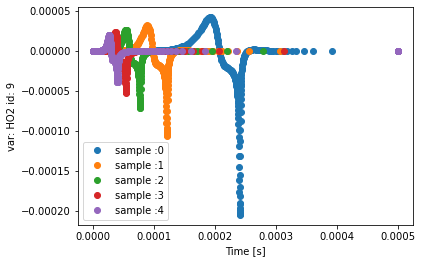

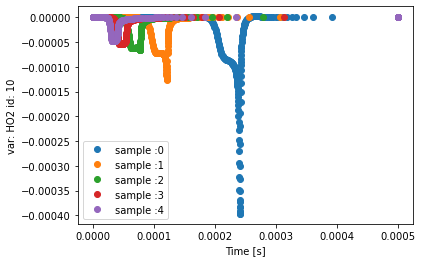

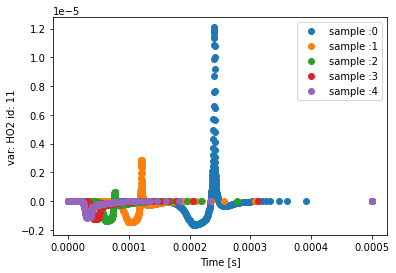

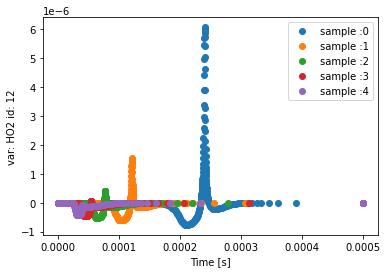

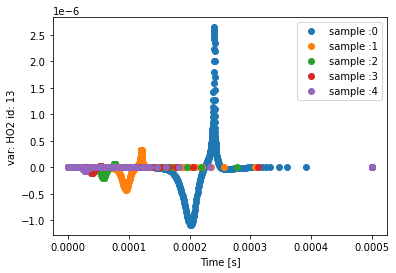

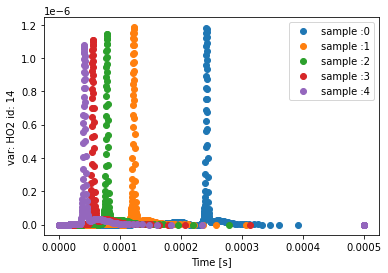

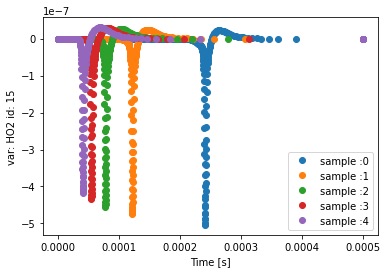

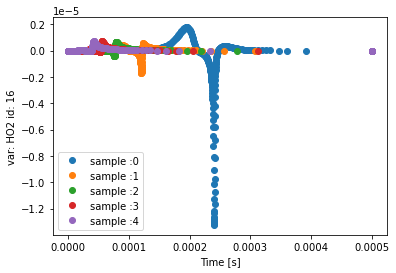

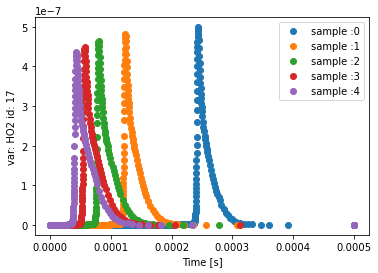

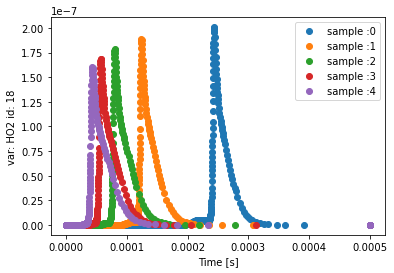

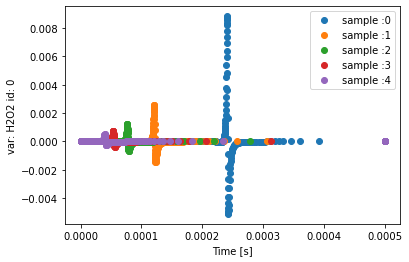

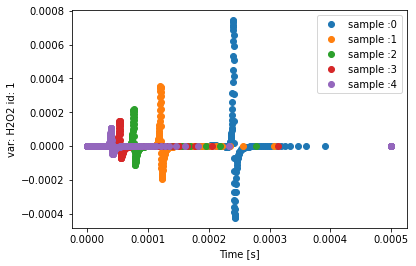

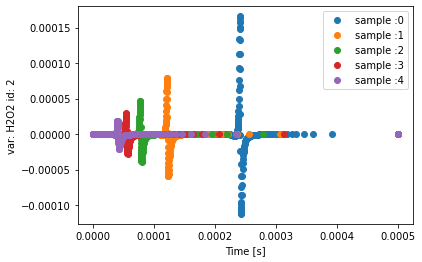

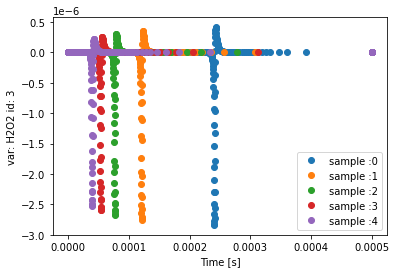

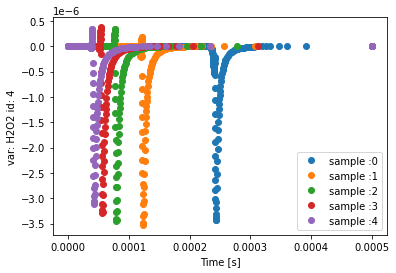

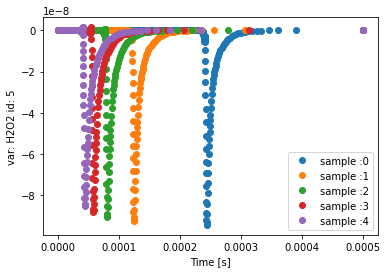

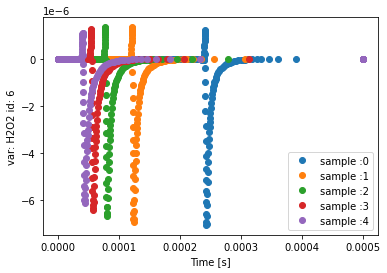

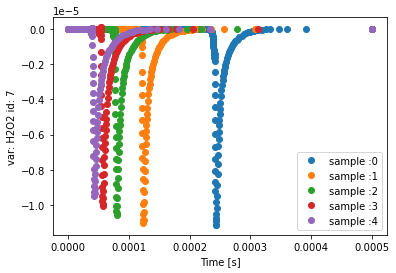

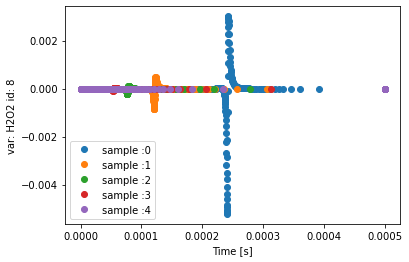

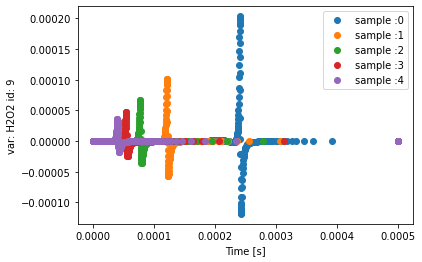

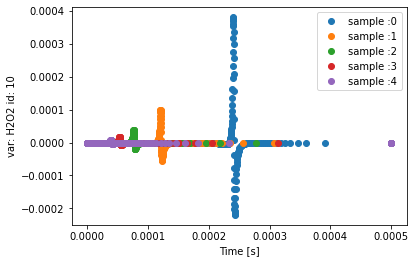

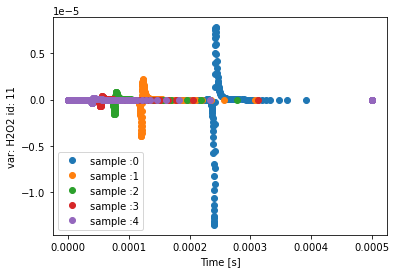

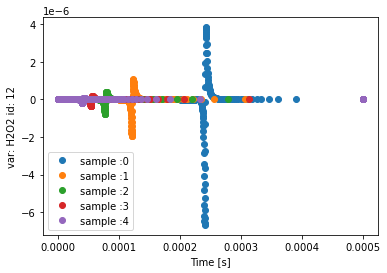

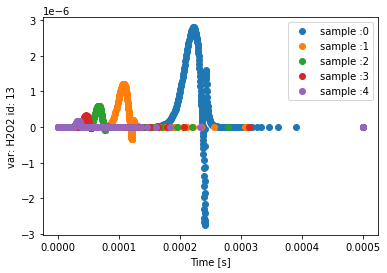

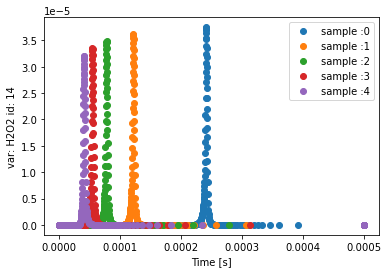

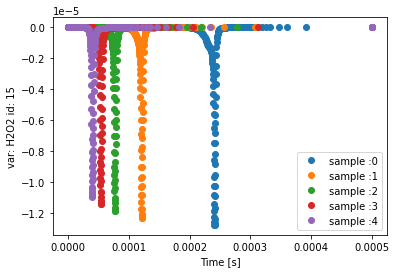

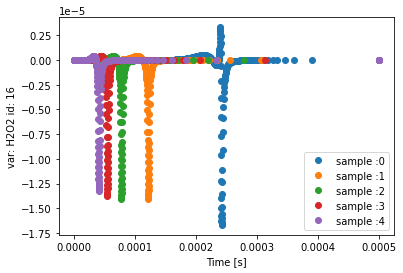

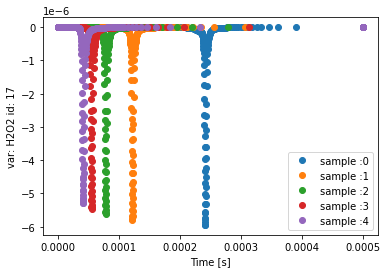

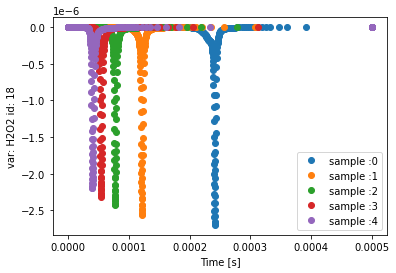

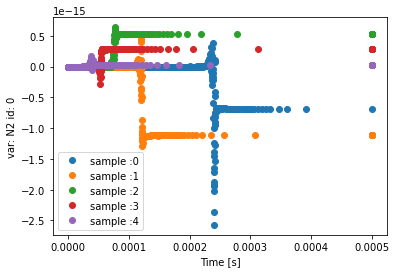

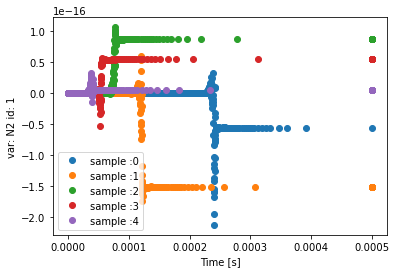

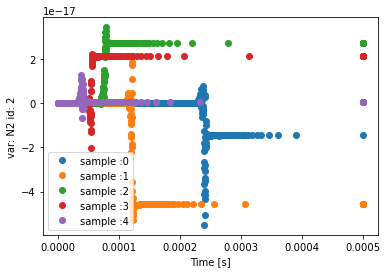

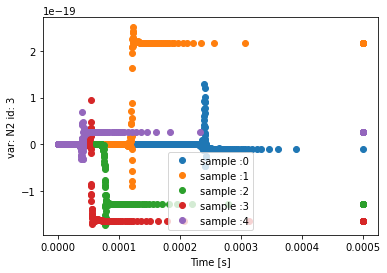

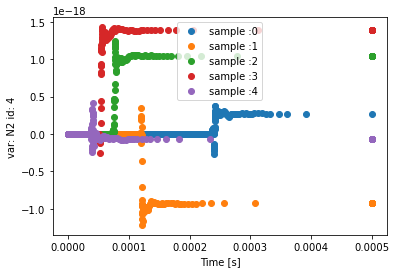

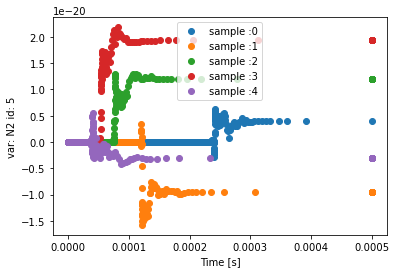

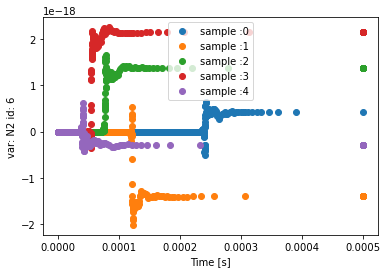

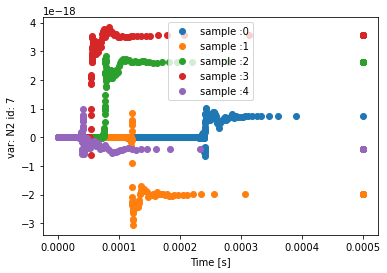

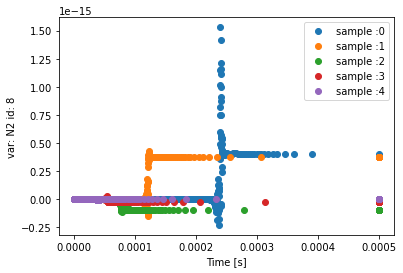

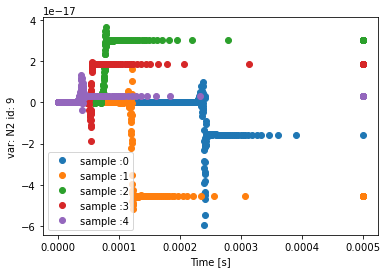

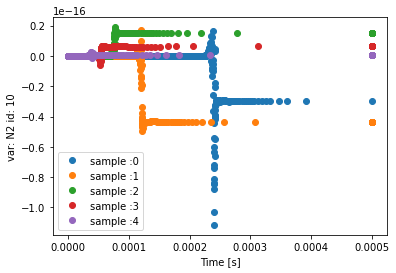

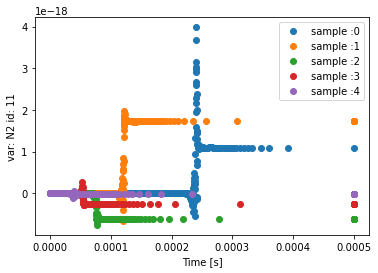

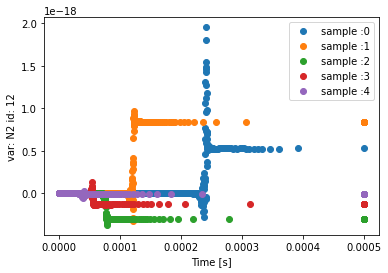

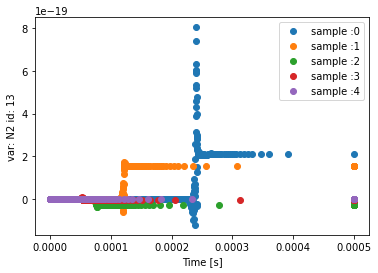

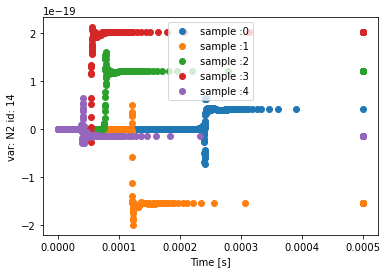

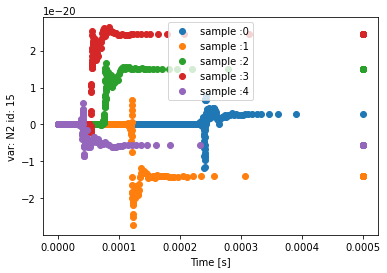

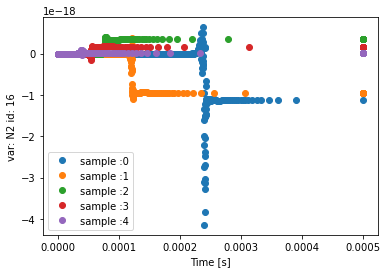

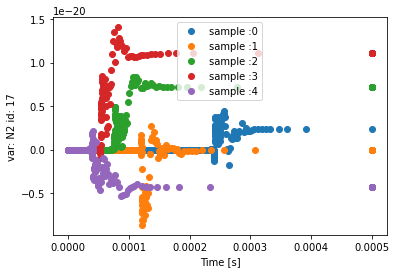

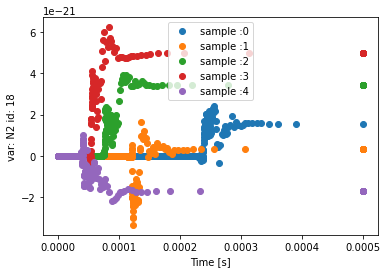

In [237]:
for i, var in enumerate(tla_labels):
    plt.figure()
    for j in range(n_samples_tla):
        plt.plot(t_tla[:,j], data_tla[:,j,i],'o', label='sample :'+str(j))
    plt.xlabel('Time [s]')
    plt.ylabel(var)
    plt.legend()